In [1]:
import os
os.chdir("C:\\datasciencepractice")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv("FuelConsumption.csv")
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [7]:
cdf=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


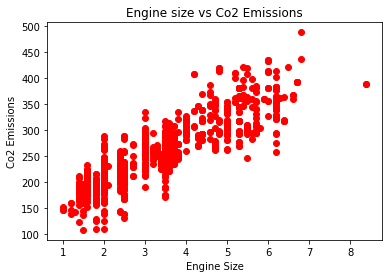

In [9]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='red')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emissions")
plt.title("Engine size vs Co2 Emissions")
plt.show()
    

In [10]:
msk=np.random.randn(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

In [12]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x,train_y)

print("Coffecient::",reg.coef_)
print("Inrecept::",reg.intercept_)

Coffecient:: [[39.42355272]]
Inrecept:: [124.83471856]


In [13]:
test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])
test_y_hat=reg.predict(test_x)

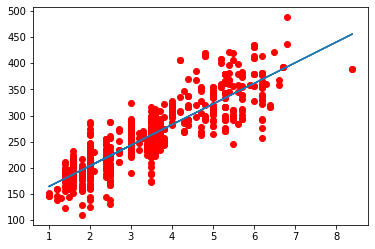

In [14]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='red')
plt.plot(train_x,train_x*reg.coef_[0][0]+reg.intercept_[0])
plt.show()

In [17]:
from sklearn.metrics import r2_score

print("Mean Absolute Error::%.2f"%np.mean(test_y_hat-test_y))
print("Reedual sum of square::%.2f"%np.mean(test_y_hat-test_y)**2)
print("Mean of Square::%.2f"%r2_score(test_y_hat,test_y))

Mean Absolute Error::2.41
Reedual sum of square::5.82
Mean of Square::0.71
